# BLACK FRIDAY SALES PREDICTION

#### Variable Definition

`User Id`: Not Unique, maps person to the particular purchase

`Product Id`: Not Unique, tells how many purchases are made for a product

`Gender`: Have only two variables: F M

`Age`: It is divided into 7 ranges, here Age is Categorical Variable

`Occupation`: There are 21 different occupation ranging from 0-21

`City Category`: Cities in which customers have lived is categorized into three categories: A, B, C

`Year` : People have lived in the current city for 0-5 years. Here 5 could mean atleast 5 years

`Marital Status`: People have their marriage status marked as either 0 or 1

`Product Category 1`: Ranges form 1-18

`Product Category 2`: Ranges form 2-18

`Product Category 3`: Ranges form 3-18

`Purchase`: It is the amount people spent in dollars for purchases. Not unique


#### Importing Libraries and Loading the train and test data

In [1]:
# manipulation 
import pandas as pd
import numpy as np

#visualiation 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Blackfriday Data.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Data Analysis

In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Checking Null values

In [6]:
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


From the above result, we can see that only `Product_Category_2` and `Product_Category_3` have null values. 
Since ` Product_Category_3` has nearly 70% null values, it will not give us any useful information.

In [7]:
df.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [8]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [10]:
df.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

#### Unique elements in each attributes

In [11]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# EDA

#### Taking `Purchase` as the target variable 

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

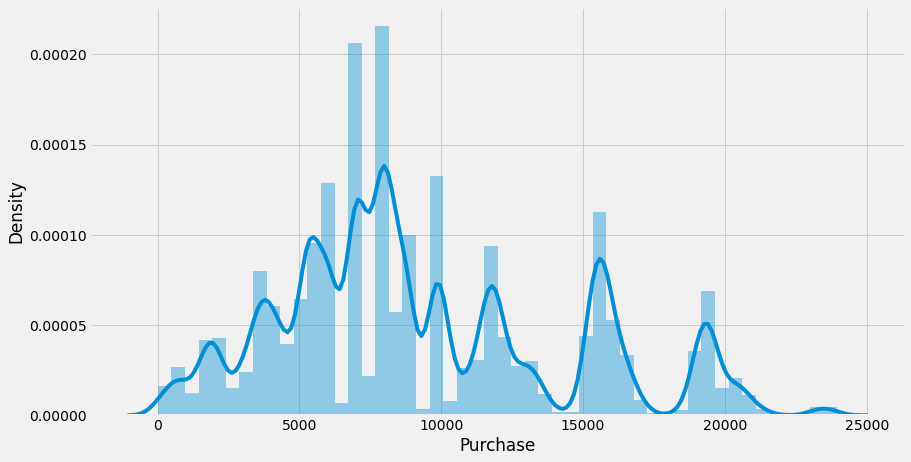

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df["Purchase"])

The above graph follows a **Gaussian Distribution**

In [13]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [14]:
df["Purchase"].skew()

0.6001400037087128

Since the skew is positive, it is a **right-skewed distribution**


In [15]:
df["Purchase"].kurtosis()

-0.3383775655851702

Negative kurtosis is called **Platykurtic Distribution** and are thin-tailed, meaning that they have few outliers.

<AxesSubplot:xlabel='Purchase'>

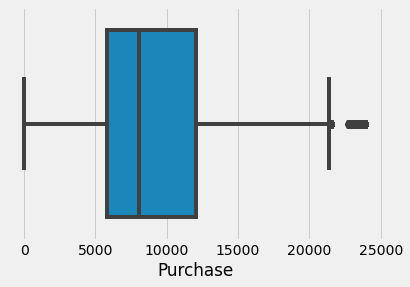

In [16]:
sns.boxplot(df['Purchase'])

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

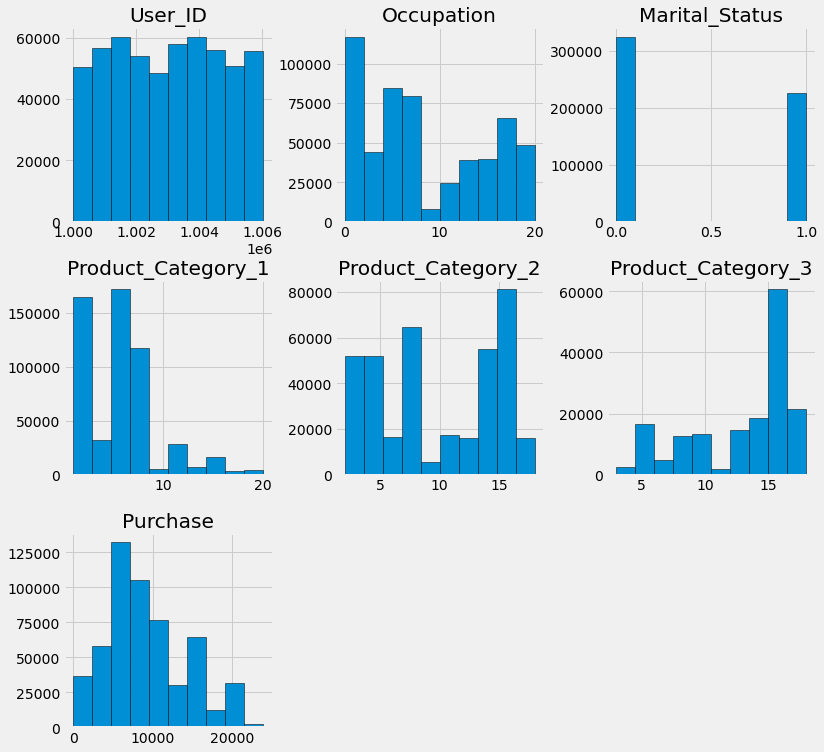

In [17]:
df.hist(edgecolor='black',figsize=(12,12))

### Gender

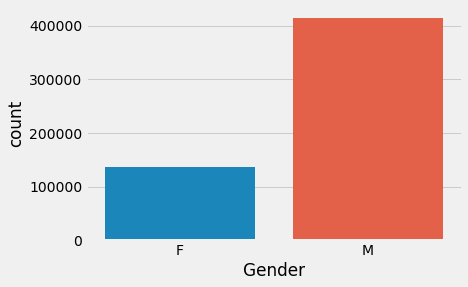

In [18]:
sns.countplot(data = df, x = 'Gender')
plt.show()

In [19]:
df['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

Hence there are more male shoppers than female.

In [20]:
df.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Males spend more than females

### Marital_Status

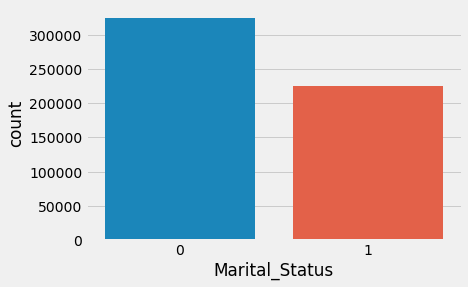

In [21]:
sns.countplot(data = df, x = 'Marital_Status')
plt.show()

This shows that the ummarried people purchase more than married people

In [22]:
df.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

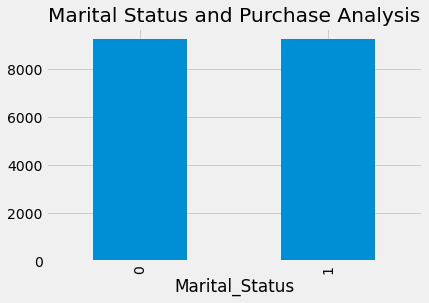

In [23]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital Status and Purchase Analysis")
plt.show()

This result is interesting since unmarried people spend more but the average purchase amount of married and unmarried people is same.

### Occupation

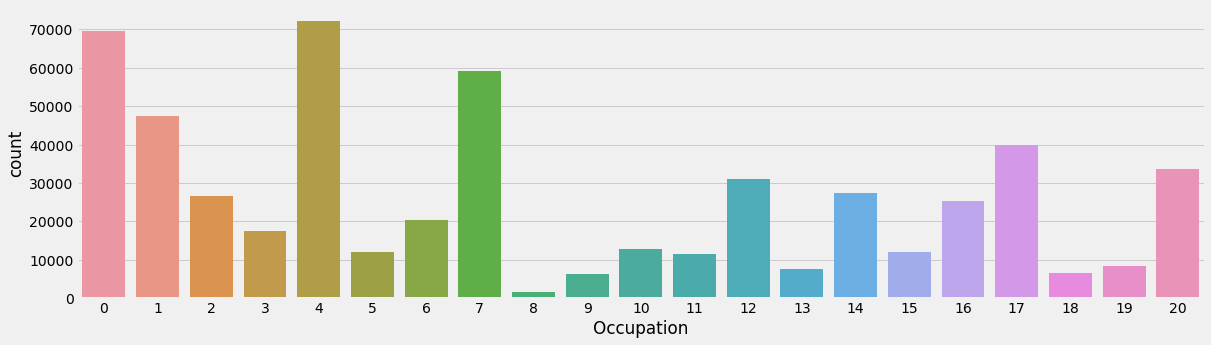

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(data = df, x = 'Occupation')
plt.show()

In [25]:
occup = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


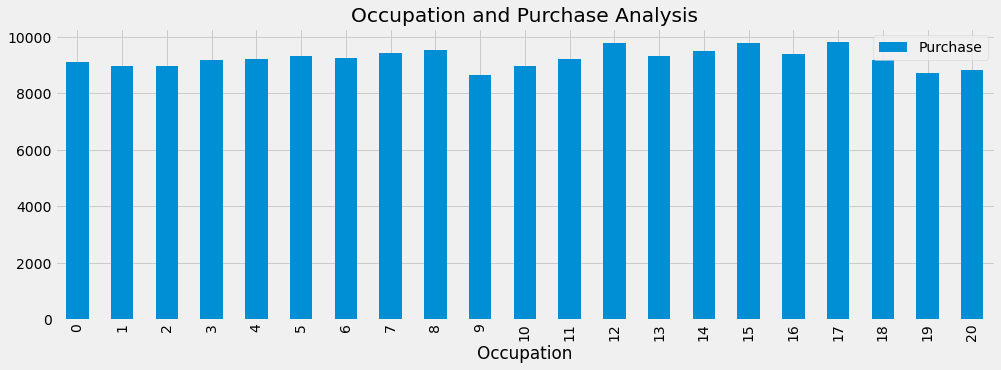

In [26]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

From the above graph, it seems that the amount each user spends on average is more or less the same for all the occupations. 

### City_Category

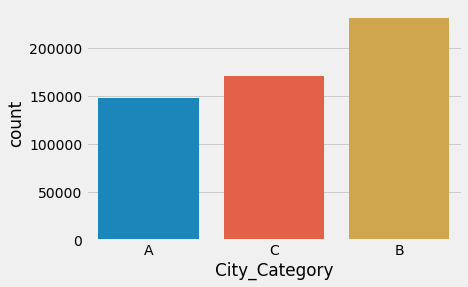

In [27]:
sns.countplot(data = df, x = 'City_Category')
plt.show()

From the above visualization, the city category B has the most number of purchases

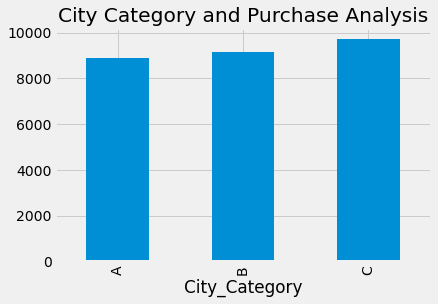

In [28]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

But the city category C has the buyers who spend more

### Stay_In_Current_City_Years

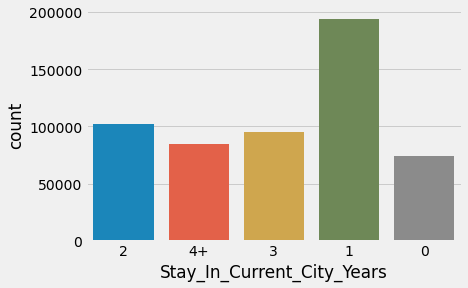

In [29]:
sns.countplot(data = df, x = 'Stay_In_Current_City_Years')
plt.show()

From the above graph, it looks like the people who have been living in the city for a long time tend to spend more than the people who moved in recently who might be taking the advantage of the Black Friday sales to purchase the necessary things for the house.

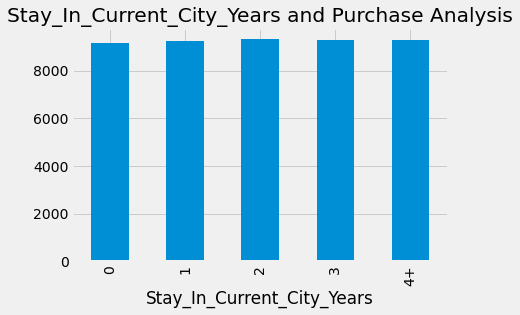

In [30]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

The above graph depicts the same behaviour as before which shows that the average people tend to spend the same amount regardless of the number of years that they have been living in the city which means that, when looking at the spendings individually, it seems that the people who moved into the city recently tend to spend more but when looking at the mean spendings, everybody seems to be sending equally independent of the number of years that they have been living in the city.


### Age

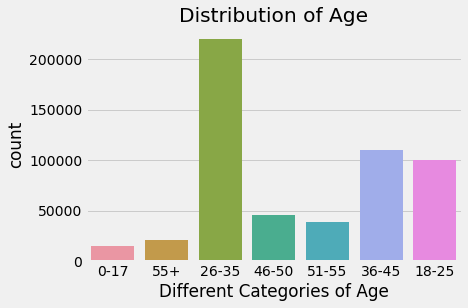

In [31]:
sns.countplot(data = df, x = 'Age')
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

The people who fall in the age group of 26-35 seems to spend more than the other age groups

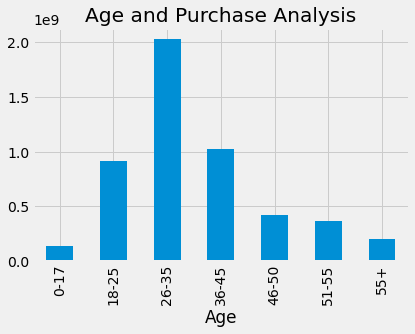

In [32]:
df.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

<AxesSubplot:xlabel='Age'>

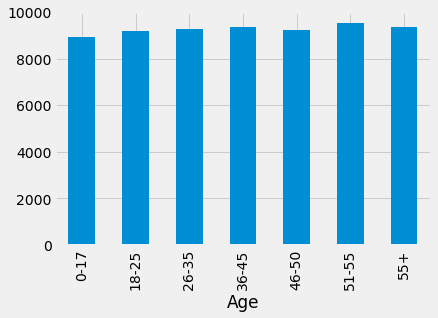

In [33]:
df.groupby("Age").mean()["Purchase"].plot(kind='bar')

The mean  puchase shows that the spending is almost same for all the age groups with the age group of 51-55 having the highest spending with a minimal difference.

## Products

Now let's look at the Product_Category_1 and Product_Category_2. This is important, as we do not have labeled items in this dataset. Theoretically, a customer could be spending $5,000 on 4 new TVs, or 10,000 pens. This difference matters for stores, as their profits are affected. Since we do not know what the items are, let's explore the categories of the items.

### Product_Category_1 

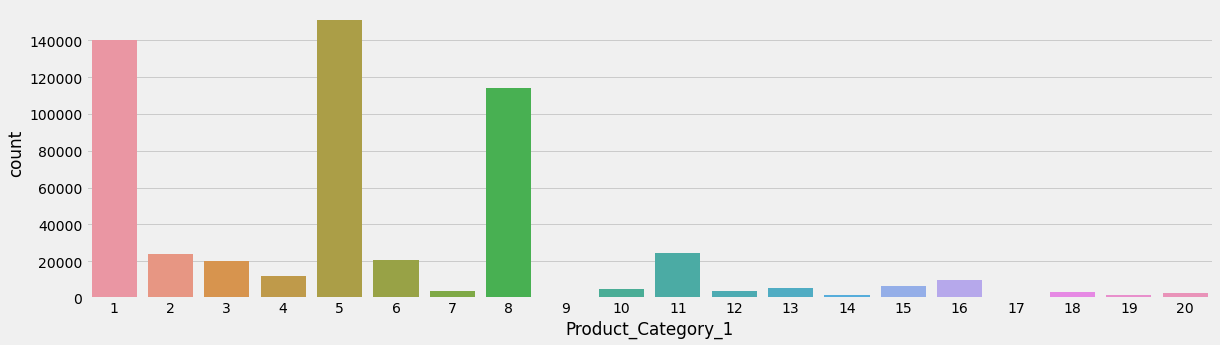

In [34]:
plt.figure(figsize=(18,5))
sns.countplot(data = df, x = 'Product_Category_1')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one.

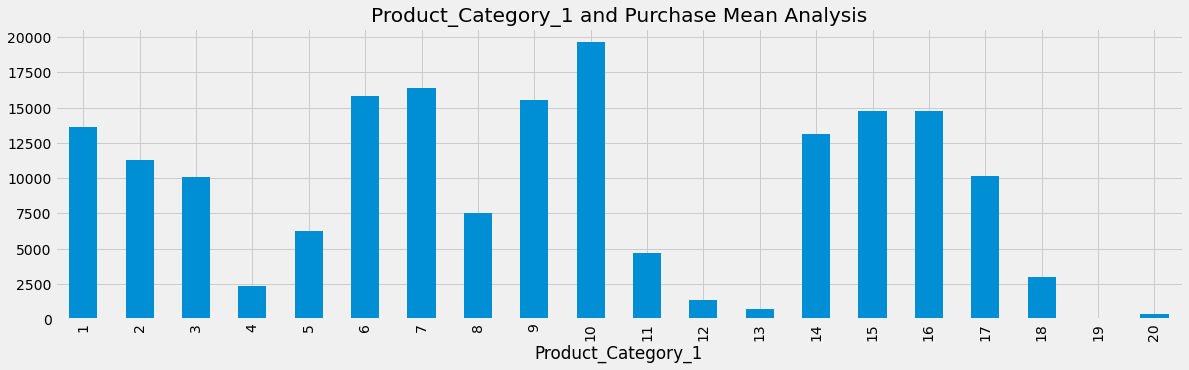

In [35]:
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

Although the categories 1,5,8 were the most bought, the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

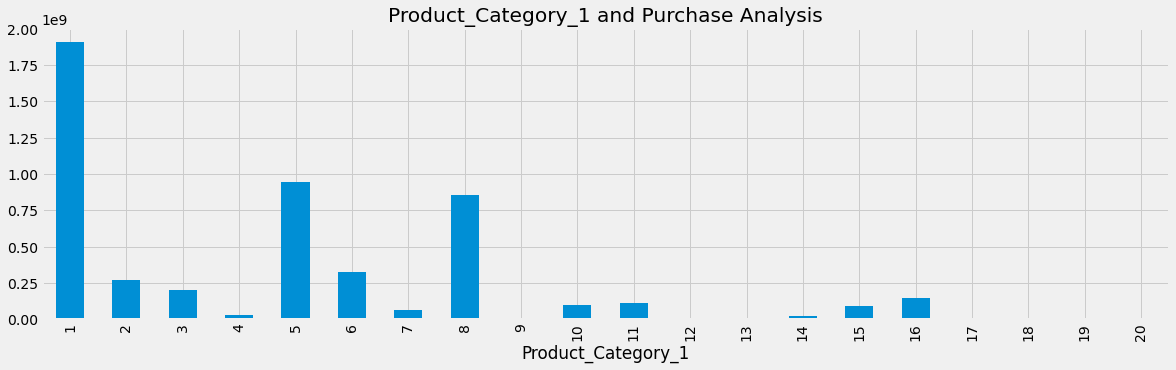

In [36]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw earlier appears here since i.e, the category lables 1,5,8 have the highest sum of sales since these are the most sold.

### Product_Category_2 

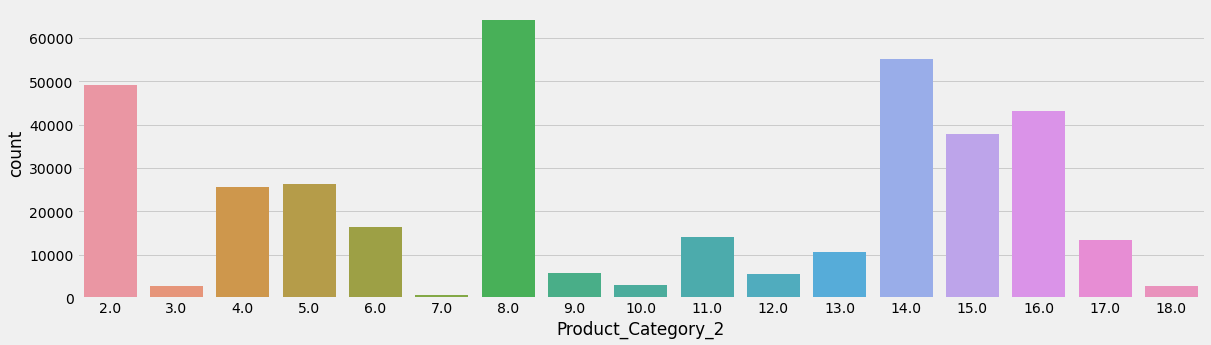

In [37]:
plt.figure(figsize=(18,5))
sns.countplot(data = df, x = 'Product_Category_2')
plt.show()

## Feature Engineering

Creating a  Feature named `Count_of_products` to store the count of products the `Product_ID` is associated with.

In [38]:
product_purchase = df.groupby(['Product_ID']).Product_ID.agg('count').to_frame('count_of_products').reset_index()
product_purchase.sort_values('count_of_products', ascending=False)

,Product_ID,count_of_products
2536,P00265242,1880
249,P00025442,1615
1016,P00110742,1612
1030,P00112142,1562
565,P00057642,1470
...,...,...
669,P00068742,1
120,P00012342,1
1530,P00162742,1
891,P00091742,1


It is observed that some products were sold more as compared to other products which could be a result of the product being more popular than the others and can be assumed to have a significant amount of bias as compared to others. Hence, creating another feature called `product_popularity_score` and to do this, at first a DataFrame was created to store all the unique Product_IDs

In [39]:
unique_products = pd.DataFrame(df.Product_ID.unique(), columns = ['Product_ID'])

#### Scaling the Count_Of_Products to obtain product_popularity_score using MinMaxScaler

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
product_purchase['product_poularity_score'] = scaler.fit_transform(product_purchase[['count_of_products']])

Now merging `product_purchase` and `unique_products` into a single dataframe `product_scores` which has the `Product_ID` and `product_popularity_score`. This was again zipped into a dictionary which has `Product_ID` as the key and `product_popularity_score` as the value.

#### Merging the two Dataframes — unique_products and product_purchase

In [41]:
product_scores = pd.merge(unique_products, product_purchase.drop( ['count_of_products'], axis = 1), on = 'Product_ID')
product_scores

,Product_ID,product_poularity_score
0,P00069042,0.120277
1,P00248942,0.308675
2,P00087842,0.053752
3,P00085442,0.180947
4,P00285442,0.107504
...,...,...
3626,P00375436,0.432677
3627,P00372445,0.444918
3628,P00370293,0.417243
3629,P00371644,0.477914


#### Creating a dictionary and mapping it to original train and test datasets

In [42]:
product_dict = dict(zip(product_scores.Product_ID, product_scores.product_poularity_score))
df['product_poularity_score'] = df['Product_ID'].map(product_dict)

In [43]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_poularity_score
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716,0.003688
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833,0.011679
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463,-0.010415
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703,-0.205178
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918,-0.133886
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006,-0.059916
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.308641
product_poularity_score,0.003688,0.011679,-0.010415,-0.205178,-0.133886,-0.059916,0.308641,1.000000


As we can observe the feature that we created i.e., `Product_Popularity_Score` have correlation 0.31 which is fairly substantial as compared to some of the other features.

In [44]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'product_poularity_score'],
      dtype='object')

In [45]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
product_poularity_score            0
dtype: int64

In [46]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [47]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
product_poularity_score       0
dtype: int64

In [48]:
# encoding values using dict

gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_poularity_score
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370,0.120277
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200,0.308675
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422,0.053752
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057,0.180947
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969,0.107504


In [49]:
#  improving the metric using one hot encoding

cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_poularity_score
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370,0.120277
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,0.308675
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422,0.053752
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057,0.180947
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969,0.107504


## Coorelation Matrix

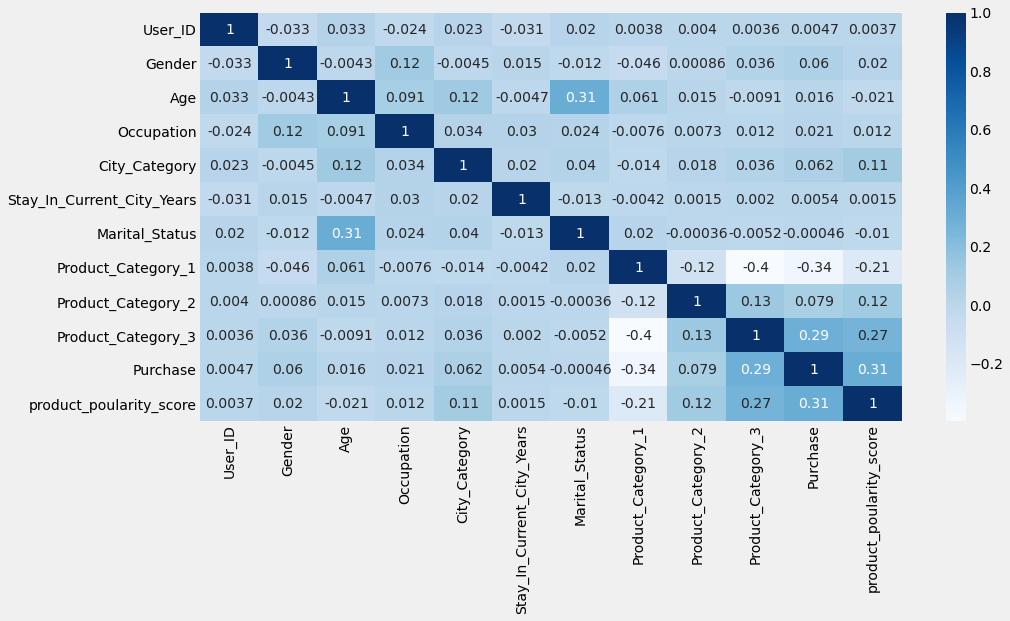

In [50]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

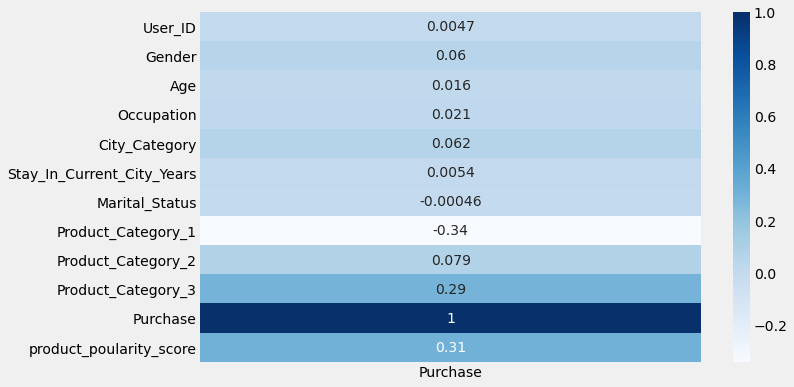

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr()[['Purchase']], cmap='Blues', annot=True)
plt.show()

Now, dropping the ID values as these are unique for every record and thus irrelevant for the predictions

In [52]:
df = df.drop(['User_ID','Product_ID'], axis = 1)

Separating the data and labels from the train dataset

In [53]:
x = df.drop('Purchase',1)
y = df['Purchase']

In [54]:
type(x)

pandas.core.frame.DataFrame

In [55]:
type(y)

pandas.core.series.Series

In the boxplot that was displayed at the start, we can see that there are a few values lying outside. 
So, let's take a look at the z-score and check if they are above the usual threshold level (generally taken as 3)

In [56]:
from scipy import stats
z = np.abs(stats.zscore(df['Purchase']))
print(len(np.where(z >= 3)[0]))

0


Now, we can safely say that there are no major outliers and we can proceed to the final section

## Modeling

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

### Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [92]:
mean_absolute_error(y_test, y_pred)

3454.2841381902495

In [93]:
mean_squared_error(y_test, y_pred)

20294829.798687257

In [94]:
r1 = r2_score(y_test, y_pred)
r1

0.19564606084804048

<AxesSubplot:title={'center':'Model Coefficients'}>

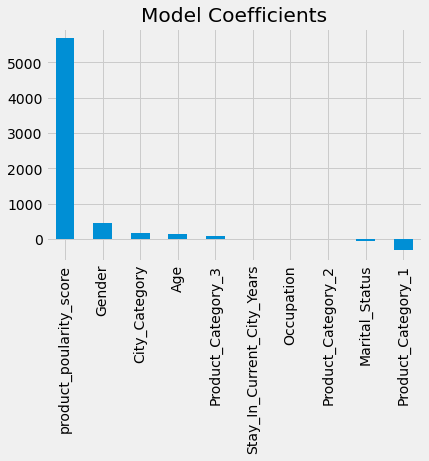

In [95]:
coef = pd.Series(lr.coef_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Model Coefficients')

### Decision Tree Regressor

In [96]:
from math import sqrt
LR = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Linear Regression Model is ",LR)

RMSE of Linear Regression Model is  4504.978334985337


In [97]:
from sklearn.tree import DecisionTreeRegressor

# creating a regressor object 
dt = DecisionTreeRegressor(random_state = 0) 

In [98]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [99]:
dt_y_pred = dt.predict(x_test)

In [100]:
mean_absolute_error(y_test, dt_y_pred)

2623.186540166653

In [101]:
mean_squared_error(y_test, dt_y_pred)

13796053.347114412

In [102]:
r2 = r2_score(y_test, dt_y_pred)
r2

0.453214933824188

In [103]:
DT = sqrt(mean_squared_error(y_test, dt_y_pred))
print("RMSE of Decision Tree Regression Model is ", DT)

RMSE of Decision Tree Regression Model is  3714.3038845945835


<AxesSubplot:title={'center':'Feature Importance'}>

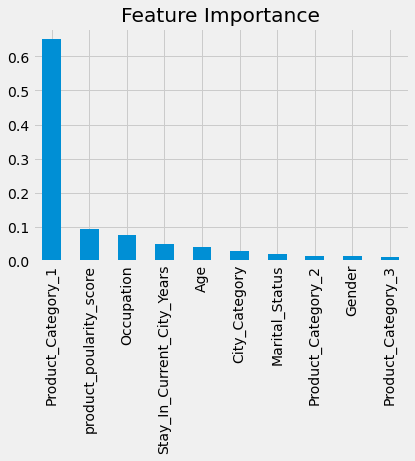

In [104]:
features = pd.Series(dt.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

### Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

# creating a regressor object 
rf = RandomForestRegressor(random_state = 0)  

In [108]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [109]:
rf_y_pred = rf.predict(x_test)

In [110]:
mean_absolute_error(y_test, rf_y_pred)

2102.862419686621

In [111]:
mean_squared_error(y_test, rf_y_pred)

8181741.756950799

In [112]:
r3 = r2_score(y_test, rf_y_pred)
r3

0.675729420911274

In [113]:
RF = sqrt(mean_squared_error(y_test, rf_y_pred))
print("RMSE of Random Forest Regression Model is ", RF)

RMSE of Random Forest Regression Model is  2860.3744085260587


<AxesSubplot:title={'center':'Feature Importance'}>

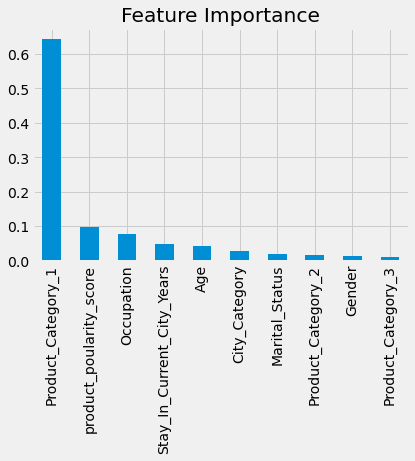

In [114]:
features = pd.Series(rf.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

### XGB Regressor

In [115]:
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=1.0, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=40, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
xgb_y_pred = xgb.predict(x_test)

In [117]:
mean_absolute_error(y_test, xgb_y_pred)

1969.6645970589461

In [118]:
mean_squared_error(y_test, xgb_y_pred)

7021926.154703956

In [119]:
r4 = r2_score(y_test, xgb_y_pred)
r4

0.7216969041378392

In [120]:
XGB = sqrt(mean_squared_error(y_test, xgb_y_pred))
print("RMSE of XGB Regression Model is ", XGB)

RMSE of XGB Regression Model is  2649.89172509066


<AxesSubplot:title={'center':'Feature Importance'}>

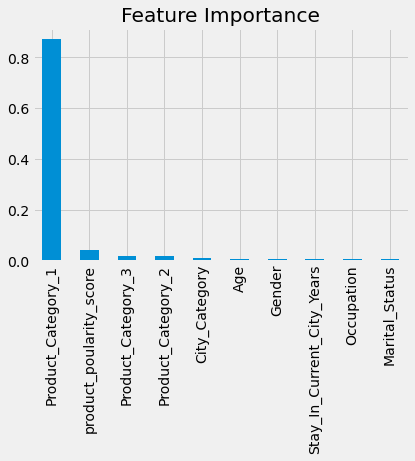

In [121]:
features = pd.Series(xgb.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

## Results

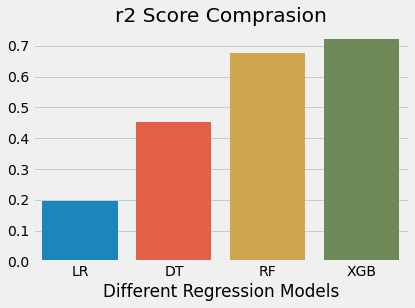

In [122]:
x = ['LR','DT','RF','XGB']
y = [r1, r2, r3, r4]

sns.barplot(x, y)
plt.title('r2 Score Comprasion')
plt.xlabel('Different Regression Models')
plt.show()

From the above graph, it is clear that `XGB Regressor` has highest r2 score.

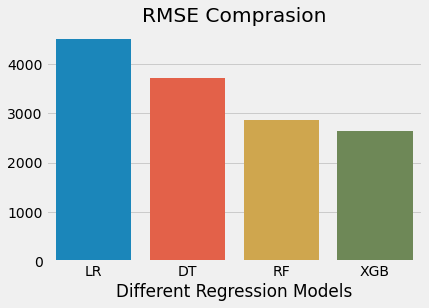

In [123]:
x = ['LR','DT','RF','XGB']
y = [LR, DT, RF, XGB]

sns.barplot(x, y)
plt.title('RMSE Comprasion')
plt.xlabel('Different Regression Models')
plt.show()

The lower the RMSE, the better a given model is able to “fit” a dataset. From the above graph, it is clear that the `XGB Regressor` has the lowest RMSE, which tells us that it’s able to fit the dataset the best out of the four models.

**Hence, the `XG Boost Regressor` is our best model.**